In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Read data
# Change data path on your computer
data_path = 'earthquakes.csv'
data = pd.read_csv(data_path)
# Print the data description
data.describe()

,magnitude,time,updated,felt,cdi,mmi,tsunami,sig,nst,dmin,rms,gap,depth,latitude,longitude,distanceKM,postcode,timezone
count,1137.000000,1.137000e+03,1.137000e+03,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,197.000000,1137.000000
mean,4.856675,1.712109e+12,1.716593e+12,414.408091,2.925242,4.320141,0.059807,432.698329,115.094107,1.342604,0.585974,55.055286,41.287300,27.308909,-3.930635,52.289358,83086.131980,21.741425
std,1.047840,1.143033e+10,9.671955e+09,5746.971362,2.562707,1.453949,0.237232,256.177844,91.877870,1.704364,0.308556,37.609237,87.866489,20.133139,118.043697,56.027469,12812.555204,440.864430
min,3.000000,1.687542e+12,1.693083e+12,0.000000,0.000000,1.000000,0.000000,138.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-43.706400,-179.807000,0.000000,8833.000000,-720.000000
25%,3.800000,1.701663e+12,1.707609e+12,0.000000,0.000000,4.000000,0.000000,234.000000,37.000000,0.100000,0.300000,30.000000,7.550000,24.195400,-104.452000,15.000000,79331.000000,-360.000000
50%,5.300000,1.713810e+12,1.719958e+12,2.000000,3.000000,4.000000,0.000000,449.000000,102.000000,0.680000,0.630000,49.000000,10.000000,31.667700,-68.682000,37.000000,79772.000000,-180.000000
75%,5.600000,1.722885e+12,1.725384e+12,24.000000,5.000000,5.000000,0.000000,518.000000,157.000000,2.061000,0.780000,68.000000,34.723000,37.497600,126.628000,61.000000,92530.000000,480.000000
max,7.600000,1.726661e+12,1.726672e+12,183786.000000,9.000000,9.000000,1.000000,2419.000000,619.000000,12.457000,2.520000,256.000000,639.503000,68.176100,179.972000,298.000000,99827.000000,780.000000


In [3]:
# Print the data
pd.DataFrame(data)

,id,magnitude,type,title,date,time,updated,url,detailUrl,felt,...,location,continent,country,subnational,city,locality,postcode,what3words,timezone,locationDetails
0,us7000necw,4.8,earthquake,"M 4.8 - 33 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182289,1726583895255,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,1893,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79783.0,landmass.perkily.affords,-300,"[{'id': '80684', 'wikidataId': '', 'name': '79..."
1,tx2024shcj,5.1,earthquake,"M 5.1 - 34 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182183,1726672002991,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,2042,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79331.0,escalator.grownups.dwell,-300,"[{'id': '89341', 'wikidataId': '', 'name': '48..."
2,ci40734823,3.7,earthquake,"M 3.7 - 6 km N of Malibu, CA",2024-09-16T11:22:08,1726485728190,1726637414586,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,1580,...,"Malibu, CA",North America,United States of America (the),California,Los Angeles,Agoura Hills-Malibu,90265.0,clocking.uploaded.issuer,-420,"[{'id': '93478', 'wikidataId': 'Q844837', 'nam..."
3,tx2024scvz,3.9,earthquake,"M 3.9 - 58 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266539,1726584426218,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,5,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,sailboats.sawn.speeding,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."
4,us7000ndte,4.1,earthquake,"M 4.1 - 60 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266382,1726334616179,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,4,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,spinners.downtime.computes,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,us6000ldpm,6.3,earthquake,"M 6.3 - 25 km NNE of Zindah Jān, Afghanistan",2023-10-07T07:12:49,1696662769702,1702589215040,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,11,...,"Zindah Jān, Afghanistan",Asia,Afghanistan,Herat,Zindah Jan,Zendeh Jan District,NaN,staked.radish.enduringly,270,"[{'id': '108', 'wikidataId': 'Q48', 'name': 'A..."
1133,us6000ldph,5.4,earthquake,"M 5.4 - 26 km NE of Zindah Jān, Afghanistan",2023-10-07T06:49:41,1696661381156,1702589215040,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,0,...,"Zindah Jān, Afghanistan",Asia,Afghanistan,Herat,Zindah Jan,Zendeh Jan District,NaN,bloomers.wondrous.possibility,270,"[{'id': '108', 'wikidataId': 'Q48', 'name': 'A..."
1134,us6000ldpg,6.3,earthquake,"M 6.3 - 32 km NNE of Zindah Jān, Afghanistan",2023-10-07T06:41:03,1696660863327,1702589215040,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,19,...,"Zindah Jān, Afghanistan",Asia,Afghanistan,Herat,Zindah Jan,Zendeh Jan District,NaN,outshone.freedmen.inequality,270,"[{'id': '108', 'wikidataId': 'Q48', 'name': 'A..."
1135,us6000lcgj,5.7,earthquake,"M 5.7 - 39 km NE of Dipayal, Nepal",2023-10-03T09:21:03,1696324863018,1702589211040,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,131,...,"Dipayal, Nepal",Asia,Nepal,Sudurpashchim,Jayaprithivi,JayaPrithvi-03,NaN,investments.ticketholder.hopefulness,345,"[{'id': '87376', 'wikidataId': '', 'name': 'As..."


In [4]:
# Remove some features that aren't important for classify / clustering the alert of the earthquake
# Feature 'date' is already converted to float type in the original dataset 
data = data.drop(['id', 'date', 'title', 'url', 'detailUrl', 'ids', 'sources',
                  'types', 'net', 'code', 'geometryType', 'status',
                  'postcode', 'what3words', 'locationDetails'], axis=1)
# Replace Null value of column 'alert' to unknown 
data.fillna({'alert': 'unknown'}, inplace=True)
# Remove samples contain Null values
data = data.dropna(how='any', axis=0)

pd.DataFrame(data)

,magnitude,type,time,updated,felt,cdi,mmi,alert,tsunami,sig,...,place,distanceKM,placeOnly,location,continent,country,subnational,city,locality,timezone
0,4.8,earthquake,1726534182289,1726583895255,1893,6,5,green,0,994,...,"33 km WSW of Ackerly, Texas",33,"WSW of Ackerly, Texas","Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,-300
1,5.1,earthquake,1726534182183,1726672002991,2042,6,5,green,0,1040,...,"34 km WSW of Ackerly, Texas",34,"WSW of Ackerly, Texas","Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,-300
2,3.7,earthquake,1726485728190,1726637414586,1580,4,4,unknown,0,591,...,"6 km N of Malibu, CA",6,"N of Malibu, CA","Malibu, CA",North America,United States of America (the),California,Los Angeles,Agoura Hills-Malibu,-420
3,3.9,earthquake,1726333266539,1726584426218,5,3,4,green,0,236,...,"58 km S of Whites City, New Mexico",58,"S of Whites City, New Mexico","Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,-300
4,4.1,earthquake,1726333266382,1726334616179,4,3,4,green,0,260,...,"60 km S of Whites City, New Mexico",60,"S of Whites City, New Mexico","Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,-300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,6.3,earthquake,1696662769702,1702589215040,11,9,8,orange,0,1010,...,"25 km NNE of Zindah Jān, Afghanistan",25,"NNE of Zindah Jān, Afghanistan","Zindah Jān, Afghanistan",Asia,Afghanistan,Herat,Zindah Jan,Zendeh Jan District,270
1133,5.4,earthquake,1696661381156,1702589215040,0,0,7,yellow,0,650,...,"26 km NE of Zindah Jān, Afghanistan",26,"NE of Zindah Jān, Afghanistan","Zindah Jān, Afghanistan",Asia,Afghanistan,Herat,Zindah Jan,Zendeh Jan District,270
1134,6.3,earthquake,1696660863327,1702589215040,19,8,8,orange,0,1014,...,"32 km NNE of Zindah Jān, Afghanistan",32,"NNE of Zindah Jān, Afghanistan","Zindah Jān, Afghanistan",Asia,Afghanistan,Herat,Zindah Jan,Zendeh Jan District,270
1135,5.7,earthquake,1696324863018,1702589211040,131,8,7,green,0,605,...,"39 km NE of Dipayal, Nepal",39,"NE of Dipayal, Nepal","Dipayal, Nepal",Asia,Nepal,Sudurpashchim,Jayaprithivi,JayaPrithvi-03,345


In [5]:
# Function to one-hot coding using get_dummies() method
def one_hot(matrix, column):
    type_dummies = pd.get_dummies(matrix[column], prefix='type')
    matrix.drop([column], axis=1, inplace=True)
    matrix = pd.concat([matrix, type_dummies], axis=1)
    return matrix


# Columns will be one-hot coding
category_columns = ['type', 'magType', 'placeOnly', 'location', 'place',
                    'continent', 'country', 'subnational', 'city', 'locality']
for column in category_columns:
    data = one_hot(data, column)

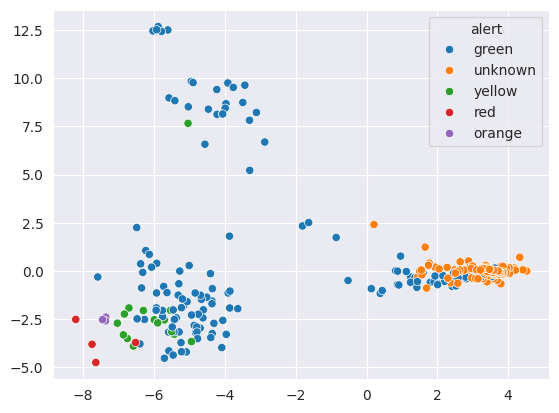

In [6]:
x_data = data.drop(['alert'], axis=1)
x_data = StandardScaler().fit_transform(x_data)
y_data = data['alert']
# Dimensionality reduction
pca = PCA(n_components=2, random_state=42)
x_data_pca = pca.fit_transform(x_data)
# Data visualization (2d) 
pc1 = x_data_pca[:, 0]
pc2 = x_data_pca[:, 1]
sns.scatterplot(x=pc1, y=pc2, hue=y_data)
plt.show()